<a href="https://colab.research.google.com/github/sashutosh/DeepLearning/blob/master/busyness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import tarfile
import urllib.request
import pandas as pd


In [11]:
from google.colab import files
uploaded = files.upload()

Saving rasmetrics.csv to rasmetrics (4).csv


In [31]:
import io
metrics = pd.read_csv(io.BytesIO(uploaded['rasmetrics.csv']),header=0, delimiter="\t").dropna()

In [13]:
metrics.dropna()

,execution_time,CPU,Disk,Memory,Heap,Worker_Threads,Unnamed: 6


In [32]:
metrics.head()

,Execution_Time,CPU,Disk,Memory,Heap,Threads
0,12821.4,6.000000,259939370.5,16.416667,0.228400,5.083333
2,12001.0,7.000000,268419508.5,17.625000,0.243294,8.000000
4,13369.6,8.333333,276503698.3,19.444444,0.295343,10.222222
6,12284.0,9.857143,284288920.4,21.714286,0.406827,13.000000
8,12998.4,11.000000,292205816.6,23.750000,0.443704,15.250000


In [33]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 816
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Execution_Time  409 non-null    float64
 1   CPU             409 non-null    float64
 2   Disk            409 non-null    float64
 3   Memory          409 non-null    float64
 4   Heap            409 non-null    float64
 5   Threads         409 non-null    float64
dtypes: float64(6)
memory usage: 22.4 KB


In [34]:
metrics.describe()

,Execution_Time,CPU,Disk,Memory,Heap,Threads
count,409.000000,409.000000,4.090000e+02,409.000000,409.000000,409.000000
mean,37403.673350,7.371329,3.681462e+08,28.105777,0.392182,34.597733
std,45847.894765,3.946568,2.401261e+08,9.715961,0.188427,31.833683
min,10816.400000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,14902.400000,4.000000,1.813551e+08,19.571429,0.215829,6.323529
50%,17645.200000,8.000000,2.869496e+08,27.139535,0.373302,24.130435
75%,33703.200000,10.000000,4.792390e+08,38.666667,0.540164,56.428571
max,327259.400000,27.000000,1.164892e+09,50.750000,0.801618,115.750000


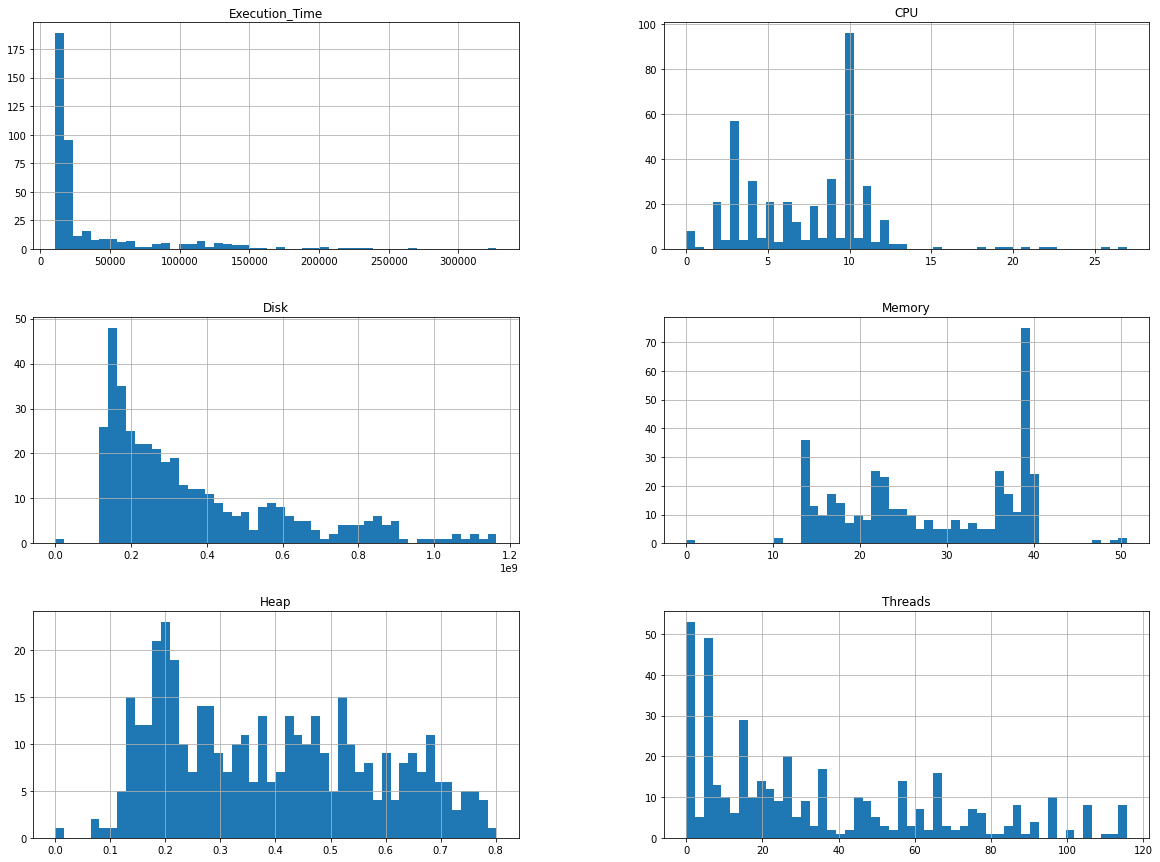

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
metrics.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
corr_matrix = metrics.corr()

In [18]:
corr_matrix["Execution_Time"].sort_values(ascending=False)

Execution_Time    1.000000
CPU               0.487713
Threads           0.433486
Disk              0.392216
Memory            0.341386
Heap              0.326532
Name: Execution_Time, dtype: float64

In [35]:
metrics["Heap"] = 100*metrics["Heap"]

In [36]:
metrics.describe()

,Execution_Time,CPU,Disk,Memory,Heap,Threads
count,409.000000,409.000000,4.090000e+02,409.000000,409.000000,409.000000
mean,37403.673350,7.371329,3.681462e+08,28.105777,39.218181,34.597733
std,45847.894765,3.946568,2.401261e+08,9.715961,18.842662,31.833683
min,10816.400000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,14902.400000,4.000000,1.813551e+08,19.571429,21.582901,6.323529
50%,17645.200000,8.000000,2.869496e+08,27.139535,37.330240,24.130435
75%,33703.200000,10.000000,4.792390e+08,38.666667,54.016353,56.428571
max,327259.400000,27.000000,1.164892e+09,50.750000,80.161813,115.750000


In [37]:
exec_time = metrics["Execution_Time"]
metrics["Execution_Time"] = metrics["Execution_Time"] /33703.2

In [25]:
metrics.describe()

,Execution_Time,CPU,Disk,Memory,Heap,Threads
count,409.000000,409.000000,4.090000e+02,409.000000,409.000000,409.000000
mean,1.109796,7.371329,3.681462e+08,28.105777,39.218181,34.597733
std,1.360342,3.946568,2.401261e+08,9.715961,18.842662,31.833683
min,0.320931,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.442166,4.000000,1.813551e+08,19.571429,21.582901,6.323529
50%,0.523547,8.000000,2.869496e+08,27.139535,37.330240,24.130435
75%,1.000000,10.000000,4.792390e+08,38.666667,54.016353,56.428571
max,9.710039,27.000000,1.164892e+09,50.750000,80.161813,115.750000


In [38]:
metrics["Disk"] = metrics["Disk"] / 479239000 #taking 75 th percentile to skip outliers

In [39]:
metrics.describe()

,Execution_Time,CPU,Disk,Memory,Heap,Threads
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,1.109796,7.371329,0.768189,28.105777,39.218181,34.597733
std,1.360342,3.946568,0.501057,9.715961,18.842662,31.833683
min,0.320931,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442166,4.000000,0.378423,19.571429,21.582901,6.323529
50%,0.523547,8.000000,0.598761,27.139535,37.330240,24.130435
75%,1.000000,10.000000,1.000000,38.666667,54.016353,56.428571
max,9.710039,27.000000,2.430712,50.750000,80.161813,115.750000


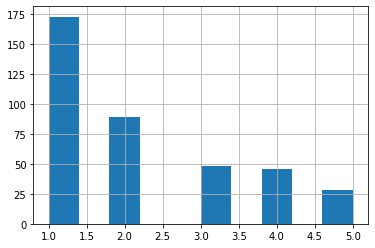

In [43]:
import pandas as pd
import numpy as np


metrics["thread_cat"] = pd.cut(metrics["Threads"],
                               bins= [0.,20,40,60,80,100],
                               labels =[1,2,3,4,5])
metrics["thread_cat"].hist()

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state = 42)


In [46]:
for train_index, test_index in split.split(metrics, metrics["thread_cat"]):
  strat_train_set = metrics.loc[train_index]
  strat_test_set = metrics.loc[test_index]

ValueError: ignored